Question 1

In [1]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

In [4]:
chunksize = 10 ** 4  
chunks = []

#chunking and data cleaning
for chunk in pd.read_json("/Users/damianzeller/Desktop/HS23/ADM/Homework 2/lighter_books.json", chunksize=chunksize, lines=True):
    chunk['average_rating'].replace('', np.nan, inplace=True)
    chunk['num_pages'].replace('', np.nan, inplace=True)
    chunk['average_rating'].replace(0.00, np.nan, inplace=True)
    chunk['num_pages'].replace(0, np.nan, inplace=True)
    chunk['average_rating'] = pd.to_numeric(chunk['average_rating'])
    chunk['num_pages'] = pd.to_numeric(chunk['num_pages'])
    chunk = chunk.dropna(subset=['average_rating', 'num_pages'])
    chunks.append(chunk[['average_rating', 'num_pages']])

#creating a dataframe    
df = pd.concat(chunks, axis=0)

In [5]:
correlation = df['average_rating'].corr(df['num_pages'])
print(correlation)

-0.00031640662915722207


The coefficient is slightly smaller than 0, indicating that there is no correlation between the length of a book and the rating.The longest books are not usually rated the worst. As the correlation is even negative, it would rather be the opposite.

Question 2

In [6]:
import json
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import numpy as np

In [7]:
chunks=[]
chunksize=10**4
nrows = 10**3

#chunking and data cleaning
for chunk in pd.read_json("/Users/damianzeller/Desktop/HS23/ADM/Homework 2/lighter_books.json", chunksize=chunksize, lines=True):
    chunk = chunk[['average_rating', 'language']]
    chunk['language'].replace('', np.nan, inplace=True)
    chunk['average_rating'].replace('', np.nan, inplace=True)
    chunk['average_rating'].replace(0.00, np.nan, inplace=True)
    chunk.dropna(subset=['language'], inplace=True)
    chunk.dropna(subset=['average_rating'], inplace=True)
    chunk['average_rating']= pd.to_numeric(chunk['average_rating'])
    chunks.append(chunk)

#Creating dataframe
chunks = pd.concat(chunks, axis=0)

#Creting a new column that is 1 for english books and 0 for nonenglish books
chunks['is_english']= chunks['language'].apply(lambda x: int( x[:3] in ['en','eng',"en-"]))

#Create groups for t-test and doing t-test
english_books= chunks[chunks['is_english'] ==1]
non_english_books= chunks[chunks['is_english'] ==0]
t_stat, p_val = ttest_ind(english_books['average_rating'], non_english_books['average_rating'])

In [8]:
print(p_val)

0.0


The p-value is very low, lower than the often used significance value of 0.05. This means, that the average rate distribution of english and non-english books isn't siginificantly different

To further illustrate this we also plotted the average rate distribution for english and nonenglish books in histograms

(array([  2587.,    833.,   6952.,   7825.,  18804., 128658., 381247.,
        599300., 229201.,  81415.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

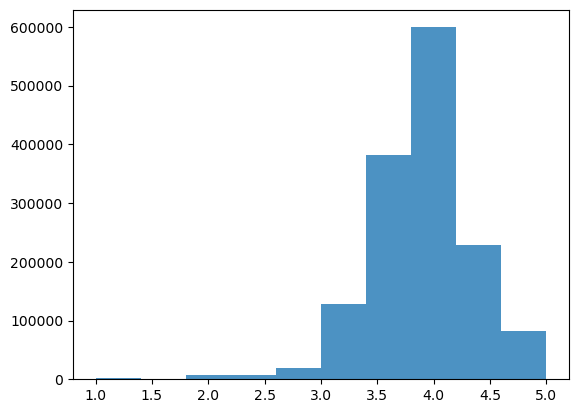

In [9]:
# Histogram for english books
plt.hist(english_books['average_rating'], alpha=0.8, label='English')

(array([  1897.,    715.,   6859.,   8003.,  18997., 115380., 302100.,
        452833., 159666.,  36380.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

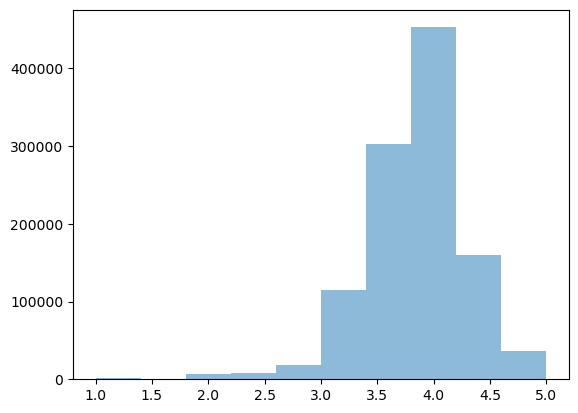

In [10]:
# Histogram for non-english books
plt.hist(non_english_books['average_rating'], alpha=0.5, label='Non_English')

The two Histograms illustrate that there is no significant difference in the average rate distribution of english and non-english books

Question 3

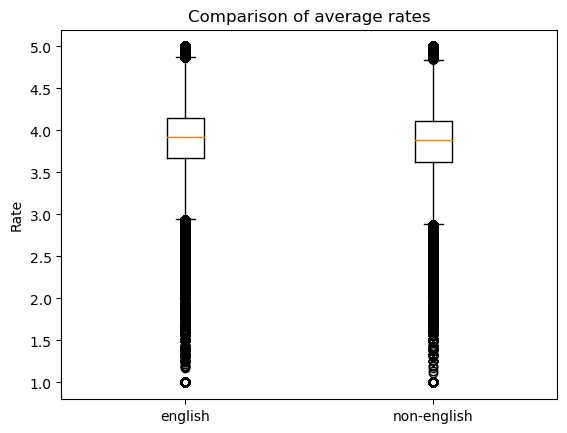

In [12]:
#Defining variables for the boxplot
ratings_english = english_books['average_rating'].tolist()
ratings_non_english = non_english_books['average_rating'].tolist()

#Creating the boxplot
plt.boxplot([ratings_english, ratings_non_english], labels=['english', 'non-english'])
plt.title('Comparison of average rates')
plt.ylabel('Rate')
plt.show()

In [19]:
#Calculating the means
mean_english = english_books['average_rating'].mean()
mean_non_english = non_english_books['average_rating'].mean()
print('Mean english books: %.3f' % mean_english)
print('Mean non-english books: %.3f' % mean_non_english)

Mean english books: 3.895
Mean non-english books: 3.839


The two means are really close to each other. The mean isn't shown in a boxplot. If the data is perfectly symmetric, the mean is identical with the median

In [20]:
#Calculating the median
median_english = english_books['average_rating'].median()
median_non_english = non_english_books['average_rating'].median()
print('Median english books: %.3f' % median_english)
print('Median non-english books: %.3f' % median_non_english)

Median english books: 3.920
Median non-english books: 3.890


The medians of english and non-english books are really close to each other. The median is the yellow line in the boxplot. Half of the average rates are above the line and half below it. In a boxplot the median is important to show the skewness of the data. As the median for both english and non-english books is more or less in the middle of the box, we can conclude that are data is symmetric.

In [21]:
#Calculating the mode
mode_english = english_books['average_rating'].mode()
mode_non_english = non_english_books['average_rating'].mode()
print('Mode english books: %.3f' % mode_english)
print('Mode non-english books: %.3f' % mode_non_english)

Mode english books: 4.000
Mode non-english books: 4.000


The mode isn't shown in a boxplot, but if the boxplot is perfectly symmetric it is identical with the mean and average.

In [22]:
#Calculating the quartiles
q1_english = english_books['average_rating'].quantile(0.25)
q2_english = english_books['average_rating'].quantile(0.5)
q3_english = english_books['average_rating'].quantile(0.75)

q1_non_english = non_english_books['average_rating'].quantile(0.25)
q2_non_english = non_english_books['average_rating'].quantile(0.5)
q3_non_english = non_english_books['average_rating'].quantile(0.75)

print('Q1 english books: %.3f' % q1_english)
print('Q2 english books: %.3f' % q2_english)
print('Q3 english books: %.3f' % q3_english)
print('Q1 non-english books: %.3f' % q1_non_english)
print('Q2 non-english books: %.3f' % q2_non_english)
print('Q3 non-english books: %.3f' % q3_non_english)

Q1 english books: 3.670
Q2 english books: 3.920
Q3 english books: 4.150
Q1 non-english books: 3.620
Q2 non-english books: 3.890
Q3 non-english books: 4.110


For both english and non-english books, the interquartile range(Q3-Q1) is quite small. This means that our data isn't really dispersed. The interqaurtile range is visualized by the length of the boxplot.

Question 4

In [23]:
import json
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [24]:
chunksize=10**4
chunks=[]

#chunking and data cleaning
for chunk in pd.read_json("/Users/damianzeller/Desktop/HS23/ADM/Homework 2/lighter_authors.json", chunksize=chunksize, lines=True):
    chunk = chunk[['fans_count', 'text_reviews_count']]
    chunk['text_reviews_count'].replace('', np.nan, inplace=True)
    chunk['fans_count'].replace('', np.nan, inplace=True)
    chunk.dropna(subset=['text_reviews_count'], inplace=True)
    chunk.dropna(subset=['fans_count'], inplace=True)
    chunk['text_reviews_count']= pd.to_numeric(chunk['text_reviews_count'])
    chunk['fans_count']= pd.to_numeric(chunk['fans_count'])
    chunks.append(chunk)

#Creating a new dataframe
chunks = pd.concat(chunks, axis=0)

#Creating variables for the Pearsons Correlation
fans = chunks['fans_count']
reviews = chunks['text_reviews_count']

#Calculating the Pearsons Correlation
correlation, _ = pearsonr(fans, reviews)
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: 0.694


The coefficient of 0.694 indicates a positive correlation. The more fans you have, the more reviews you will get.

Question 5

Hypothesis testing is usually done by formulating a null hypothesis, which states that their either is a certain relationship between variables or not. In a second step the prediction of the hypothesis is tested by observing data, which leads to a rejection or acceptance of the null hypothesis. The tests used for hypothesis testing can be divded in two groups: Parametric and nonparametric tests. The main difference between these kind of tests is that parametric tests make certain assumptions about the data (e.g. normally distributed, same variance, sampled randomly), while nonparametric tests don't do that and are more factual. Further for parametric tests the sample size needs to be bigger. We chose parametric tests as they can be computed and interpreted easier than nonparametric tests and we didn't see any of the assumptions about the data as violated.